Syntax natürlicher Sprachen, WS 2025/26

# Vorlesung 09 - Feature-basierte Grammatiken (FCFGs)

In [1]:
import nltk
from nltk import Tree
from nltk import parse
from nltk.grammar import FeatureGrammar

In [2]:
def cfg_parsing(cfg_grammar, sent):
    parser = nltk.ChartParser(cfg_grammar)
    for tree in parser.parse(sent.split()):
        tree.pretty_print(unicodelines=True)

In [3]:
def feat_parsing(feat_grammar, sent):
    parser = nltk.FeatureChartParser(feat_grammar)
    trees = list(parser.parse(sent.split()))
    if trees: [show_FeatTree(tree, style=1) for tree in trees]
    else: print(f"NO PARSE FOUND FOR: {sent}")

def show_FeatTree(tree, style=0, draw=1):
    if draw:
        tree = Tree.fromstring(str(tree).replace(", ",","))
        if style: 
            display(tree)
        else: 
            tree.pretty_print(unicodelines=True)
    else: print("FOUND PARSE:\n", str(tree).replace("\n"," "))

In [4]:
cfg_grammar = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> DET N
    VP -> V| V NP

    DET -> "der" | "den" | "die"
    N -> "Hund" | "Katze"
    V -> "bellt" | "sieht"
""")

In [5]:
cfg_parsing(cfg_grammar, "die Katze sieht den Hund")

                S               
     ┌──────────┴────┐           
     │               VP         
     │          ┌────┴───┐       
     NP         │        NP     
 ┌───┴────┐     │    ┌───┴───┐   
DET       N     V   DET      N  
 │        │     │    │       │   
die     Katze sieht den     Hund



In [6]:
cfg_parsing(cfg_grammar, "der Hund bellt")

         S        
     ┌───┴─────┐   
     NP        VP 
 ┌───┴───┐     │   
DET      N     V  
 │       │     │   
der     Hund bellt



#### Übergenerierung:

In [7]:
cfg_parsing(cfg_grammar, "den Katze bellt der Hund") #Verletzung Subkategorisierung, Subjekt/Objektkasus, nominales Agreement

                S               
     ┌──────────┴────┐           
     │               VP         
     │          ┌────┴───┐       
     NP         │        NP     
 ┌───┴────┐     │    ┌───┴───┐   
DET       N     V   DET      N  
 │        │     │    │       │   
den     Katze bellt der     Hund



### Feature-Constraints verhindern Übergenerierung:

In [8]:
feat_grammar = FeatureGrammar.fromstring(r"""
% start S

    S -> NP[CASE=nom] VP
    NP[CASE=?y] -> DET[GEN=?x, CASE=?y] N[GEN=?x, CASE=?y]
    VP -> V[SUBCAT=ITV]
    VP -> V[SUBCAT=TV, OBJCASE=?x] NP[CASE=?x]

    DET[GEN=mask, CASE=nom] -> "der"
    DET[GEN=mask, CASE=akk] -> "den"
    DET[GEN=fem] -> "die"

    N[GEN=mask] -> "Hund"
    N[GEN=fem] -> "Katze"

    V[SUBCAT=ITV] -> "bellt"
    V[SUBCAT=TV, OBJCASE=akk] -> "sieht"
""")


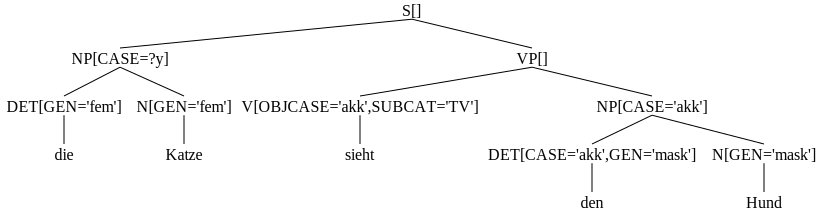

In [9]:
feat_parsing(feat_grammar, "die Katze sieht den Hund")

In [10]:
feat_parsing(feat_grammar, "den Katze bellt der Hund") #Verletzung Subkategorisierung, Subjekt/Objektkasus, nominales Agreement

NO PARSE FOUND FOR: den Katze bellt der Hund


In [11]:
feat_parsing(feat_grammar, "die Katze bellt den Hund") #Subcat

NO PARSE FOUND FOR: die Katze bellt den Hund


In [12]:
feat_parsing(feat_grammar, "die Katze sieht der Hund") #Objcase

NO PARSE FOUND FOR: die Katze sieht der Hund


In [13]:
feat_parsing(feat_grammar, "den Hund bellt") #Subjcase

NO PARSE FOUND FOR: den Hund bellt


In [14]:
feat_parsing(feat_grammar, "der Hund sieht den Katze") #nomAgreement

NO PARSE FOUND FOR: der Hund sieht den Katze
